In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

Access eBOSS quasars data
In this notebook we show a simple way to retrive a small amount of data from the SDSS repository and explore what is those. We might use this data in future classes, for now we will only explore them, and maybe do some plots...
(Adapted from the one originally made for MACSS 2019)
PART 1: Get the data
You will need to download:
- The quasar catalog https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/  (~1Gb)
- The spPlates files as many as required for the sample we will define later... but be careful and dot download everything as it is ~300Gb. 

You can download the files directly from https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/ and https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/ digging in each plate directory. Or follow the notebook...

In [3]:
#Define the URL for the data to download and the filename as well as the local directory where to be saved.  
DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="./"
local_file = os.path.join(local_dir,file)

In [4]:
#Simple instructions to download the catalog, it checks it don't exist...
#It can take a while so don't desperate.

if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))

downloading DR14 quasar dataset from https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/DR14Q_v4_4.fits to ./DR14Q_v4_4.fits
Downloaded file./DR14Q_v4_4.fits


In [5]:
catalog=Table.read('DR14Q_v4_4.fits')
catalog.colnames

['SDSS_NAME',
 'RA',
 'DEC',
 'THING_ID',
 'PLATE',
 'MJD',
 'FIBERID',
 'SPECTRO',
 'Z',
 'Z_ERR',
 'SOURCE_Z',
 'Z_VI',
 'Z_PIPE',
 'Z_PIPE_ERR',
 'ZWARNING',
 'Z_PCA',
 'Z_PCA_ER',
 'Z_MGII',
 'BOSS_TARGET1',
 'ANCILLARY_TARGET1',
 'ANCILLARY_TARGET2',
 'EBOSS_TARGET0',
 'EBOSS_TARGET1',
 'EBOSS_TARGET2',
 'N_SPEC_SDSS',
 'N_SPEC_BOSS',
 'N_SPEC',
 'PLATE_DUPLICATE',
 'MJD_DUPLICATE',
 'FIBERID_DUPLICATE',
 'SPECTRO_DUPLICATE',
 'BI_CIV',
 'ERR_BI_CIV',
 'RUN_NUMBER',
 'RERUN_NUMBER',
 'COL_NUMBER',
 'FIELD_NUMBER',
 'OBJ_ID',
 'PSFFLUX',
 'IVAR_PSFFLUX',
 'PSFMAG',
 'ERR_PSFMAG',
 'MI',
 'GAL_EXT',
 'RASS_COUNTS',
 'RASS_COUNTS_SNR',
 'SDSS2ROSAT_SEP',
 'FLUX_0.2_2.0keV',
 'FLUX_0.2_2.0keV_ERR',
 'FLUX_2.0_12.0keV',
 'FLUX_2.0_12.0keV_ERR',
 'FLUX_0.2_12.0keV',
 'FLUX_0.2_12.0keV_ERR',
 'LUM_0.2_12.0keV',
 'SDSS2XMM_SEP',
 'GALEX_MATCHED',
 'FUV',
 'FUV_IVAR',
 'NUV',
 'NUV_IVAR',
 'JMAG',
 'ERR_JMAG',
 'JSNR',
 'JRDFLAG',
 'HMAG',
 'ERR_HMAG',
 'HSNR',
 'HRDFLAG',
 'KMAG',
 'ERR_K

In [6]:
catalog

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.45+174625.4,0.001898274356335605,17.773739123771385,268270422,7596,56945,162,BOSS,2.309,0.0,VI,2.309000015258789,2.307750701904297,0.0010300044668838382,0,2.3045657000000004,-1.0,-1.0,0,0,0,0,4096,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.0379366874694824 .. 2.631136417388916,12.372532844543457 .. 0.8706143498420715,22.440338134765625 .. 21.372461318969727,0.2871243953704834 .. 0.38545534014701843,-24.410782,0.12021728605031967 .. 0.03581845760345459,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.30231887102127075,8.785573140381722,0.7275648713111877,4.537358964921044,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1.0,-1.0,-1.0
000000.57+055630.8,0.0023754761888312714,5.941903005523435,163544156,8740,57367,694,BOSS,2.1031202999999996,0.0,AUTO,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,hH00,BCUU,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616

In [7]:
#select objects with THING_ID>0. Also select the qso's within the zmin, zmax redshift interval, defined so that
#we capture many lyman alpha quasars 
w=(catalog['THING_ID']>0) & (catalog['Z']>2) & (catalog['Z']<4) & (catalog['RA']!=catalog['DEC'])& (catalog['RA']>0) & (catalog['DEC']>0)
reduced_cat=catalog[w]
reduced_cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.45+174625.4,0.001898274356335605,17.773739123771385,268270422,7596,56945,162,BOSS,2.309,0.0,VI,2.309000015258789,2.307750701904297,0.0010300044668838382,0,2.3045657000000004,-1.0,-1.0,0,0,0,0,4096,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.0379366874694824 .. 2.631136417388916,12.372532844543457 .. 0.8706143498420715,22.440338134765625 .. 21.372461318969727,0.2871243953704834 .. 0.38545534014701843,-24.410782,0.12021728605031967 .. 0.03581845760345459,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.30231887102127075,8.785573140381722,0.7275648713111877,4.537358964921044,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1.0,-1.0,-1.0
000000.57+055630.8,0.0023754761888312714,5.941903005523435,163544156,8740,57367,694,BOSS,2.1031202999999996,0.0,AUTO,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,hH00,BCUU,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616

In [8]:
#Group the catalog by PLATE and select only first N objects you want to use... 
#Note I've used only 50 here but the idea would be to download many more... 
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:100]
small_cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
002927.12+005959.1,7.3630113436661695,0.9997557609564308,119126428,3586,55181,594,BOSS,2.197,0.0,VI,2.197000026702881,2.2041704654693604,0.0019501503556966786,0,2.2176769,2.1851583,2.1851583,81920,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.082460641860962 .. 5.404262542724609,17.25505828857422 .. 1.4724500179290771,22.39624786376953 .. 20.648351669311523,0.2337706983089447 .. 0.15968485176563263,-24.988821,0.1120922863483429 .. 0.03339763358235359,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.02334750071167946,16.08032872380867,0.013374969363212584,124.61452751266,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,17.288,0.163,6.699999809265137,0.9566,16.323,0.259,4.199999809265137,0.9101,12.138,0.42,2.5999999046325684,0.8814,8.777000000000001,0.163,-0.5,1.124,0000,BBCU,0.402873,1.0,1.5315462999617797e-31,3.49182712801592e-32,2.369125168884542e-31,3.257587838095501e-32,2.946421964418005e-31,8.163112961552275e-32,3.268164172192872e-31,4.075393363894775e-32,0,-1.0,-1.0,-1.0
002951.92+011450.1,7.466360282002142,1.247255758767018,124326006,3586,55181,622,BOSS,2.092,0.0,VI,2.0920000076293945,2.1335699558258057,0.0009776175720617175,0,2.1113958,2.0834067,2.0834067,16384,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.9829164743423462 .. 4.830942153930664,19.4893741607666 .. 1.8968703746795654,22.497323989868164 .. 20.765296936035156,0.24063898622989655 .. 0.15602481365203857,-24.948919,0.11912687122821808 .. 0.03549357131123543,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.034334227442741394,26.000245826780446,0.04506143182516098,34.706384627050674,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,17.435,0.189,5.69999

Text(0,0.5,'DEC')

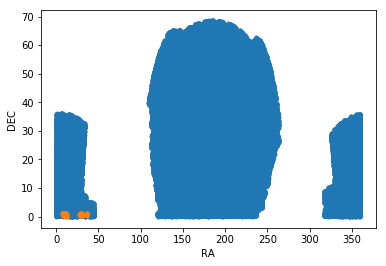

In [9]:
#Lets plot the distribution in RA/DEC of the full catalog, and the small catalog
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='.')
plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

In [10]:
thing_id=small_cat['THING_ID']
fiberid=small_cat['FIBERID']
plate=small_cat['PLATE']
zqso=small_cat['Z']

In [11]:
#GET THE UNIQUE PLATES WE NEED TO DOWNLOAD FOR THE SELECTION ABOVE AND CONSTRUCT THE FILE NAMES WE NEED. 
plate_list=[]
for p,m in zip(small_cat['PLATE'],small_cat['MJD']):
    plate_list.append(str(p)+'/spPlate-'+str(p)+'-'+str(m)+'.fits')
plate_list=np.unique(plate_list)
plate_list

array(['3586/spPlate-3586-55181.fits', '3587/spPlate-3587-55182.fits',
       '3588/spPlate-3588-55184.fits', '3589/spPlate-3589-55186.fits',
       '3590/spPlate-3590-55201.fits', '3606/spPlate-3606-55182.fits',
       '3609/spPlate-3609-55201.fits', '3615/spPlate-3615-55179.fits',
       '3615/spPlate-3615-55208.fits', '3615/spPlate-3615-56544.fits'],
      dtype='<U28')

In [ ]:
#Takes some minutes... we will have this data on a 
plates_url='https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/'
plates_local='./spPlates/'

if not os.path.exists(plates_local):
        os.makedirs(plates_local)

for plate_ in plate_list:
    url_file = os.path.join(plates_url,plate_)
    local_file=plates_local+plate_.split("/")[1]
    if not os.path.exists(local_file):
        print("downloading spplate from %s to %s"
              % (url_file, local_file))
        tmp = urllib.request.urlretrieve(url_file, local_file)
    else:
        print('%s  %s present on disk. '%(url_file,local_file))

PART 2: Explore the qso data.
Lets explore what is in those file we've downloaded. For a full description of the spPlates look https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/PLATE4/spPlate.html

In [ ]:
#Explore the fist of the spPlates.
file=plates_local+plate_list[2].split("/")[1]
plate1=pyfits.open(file)
print(file)

In [ ]:
plate1.info()

In [ ]:
#What is in the PLUGMAP
plugmap=plate1['PLUGMAP'].data
Table(plugmap)

In [ ]:
#Select from small catalog only qso's that are in first spPlate.
thisplate=plate_list[2].split("/")[0]
w=plate==int(thisplate)
ids_=fiberid[w]
zqso_=zqso[w]

In [ ]:
#Select from the plugmap nly the qso's that are in the small catalog. 
w=np.in1d(plugmap['FIBERID'],ids_)
small_plugmap=plugmap[w]
Table(small_plugmap)

In [ ]:
#Get the wavelenght
pltheader=plate1[0].header
coeff0=pltheader['COEFF0']
coeff1=pltheader['COEFF1']

In [ ]:
#Get the spectra
flux=plate1[0].data
ivar=plate1[1].data
logwave=coeff0+coeff1*np.arange(flux.shape[1])

In [ ]:
#Plot some of the specta
plt.figure(figsize=(6,40),dpi=100)
i=0
for i in range(4):
    plt.subplot(len(ids_),1,i+1)
    plt.plot(10**logwave,flux[ids_[i]-1])
    plt.ylabel('Flux 1E-17 erg/cm^2/s/Ang')
    plt.xlabel('\lambda [\Ang]')
    plt.xlim(3500,6000)
    i+=1

Exercise: Ideally you'll do both but you can start with the one is more interesting for you.
For those interested in quasars :D
Do they look like Lya quasars?
Plot some of the spectra in the rest frame
Cut the spectra to save only the Lya region defined between 104-120nm in the rest frame
For each spectra save the zqso,wave,flux_lya,ivar, and save all in a single file.
Make other selections criteria, to see other types of quasars...
For those just practicing/playing with the data
Find other variables that could be linked between the spPlates and the DR14Q file.
Play making different selections, maybe based in redshift, or color, or different combinations.
From the spPlates, what other types of objets are? make a descriptive analysis of these data, and the DR14Q f